# Coronavirus COVID-19 in Spain

Data from Minifestio de Sanidad, https://www.epdata.es/

In [80]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [81]:
# Read data

raw_data = pd.read_json('./data/nuevos_casos_diarios_de_c.json')

In [82]:
# Create list with dates and cases

number_days_monitored = len(raw_data['Datos'].Metricas[0]['Datos'])
list_cases_dates = []
for day in range(number_days_monitored):
    date = raw_data['Datos'].Metricas[0]['Datos'][day]['Parametro']
    cases = raw_data['Datos'].Metricas[0]['Datos'][day]['Valor']
    list_cases_dates.append([date, cases])

In [83]:
# Create dataframe df0

df0 = pd.DataFrame(list_cases_dates, columns = ['Date' , 'Cases'])
df0.head()

,Date,Cases
0,Día 31 (Enero),1
1,Día 1 (Febrero),0
2,Día 2 (Febrero),0
3,Día 3 (Febrero),0
4,Día 4 (Febrero),0


In [84]:
# Extract day and month fron Date column and replace month name by the corresponding number month

df0[['Day', 'Month']] = df0['Date'].str.extract(r'([\d]+) \((.*?)\)')
dict_months = {'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':7, 'Agosto':8, 'Septiembre':9, 'Octubre':10, 'Noviembre':11, 'Diciembre':12}
df0.replace({'Month': dict_months}, inplace= True)

In [85]:
# Create new column, Period (Datetime format)

df0['Period'] = '2020' + '/' + df0['Month'].astype(str) + '/' + df0['Day'].astype(str)
df0['Period'] = df0['Period'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d'))
df0.head(10)

,Date,Cases,Day,Month,Period
0,Día 31 (Enero),1,31,1,2020-01-31
1,Día 1 (Febrero),0,1,2,2020-02-01
2,Día 2 (Febrero),0,2,2,2020-02-02
3,Día 3 (Febrero),0,3,2,2020-02-03
4,Día 4 (Febrero),0,4,2,2020-02-04
5,Día 5 (Febrero),0,5,2,2020-02-05
6,Día 6 (Febrero),0,6,2,2020-02-06
7,Día 7 (Febrero),0,7,2,2020-02-07
8,Día 8 (Febrero),0,8,2,2020-02-08
9,Día 9 (Febrero),1,9,2,2020-02-09


In [86]:
# Drop useless columns and sort by Period column

df = df0.drop(['Date', 'Day', 'Month'], axis=1)
df.sort_values(by=['Period'], inplace = True)
df['Day'] = range(number_days_monitored)
df.head()

,Cases,Period,Day
0,1,2020-01-31,0
1,0,2020-02-01,1
2,0,2020-02-02,2
3,0,2020-02-03,3
4,0,2020-02-04,4


In [87]:
# Calculate the cumulative and the variation rate of the daily cases

df['CasesAccum'] = df['Cases'].cumsum()
df['VariationRate'] = df['Cases'].pct_change() * 100
df['VariationRateCum'] = df['CasesAccum'].pct_change() * 100
init_quarantine = 44

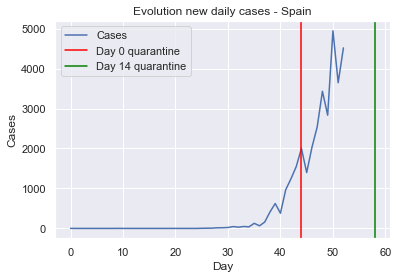

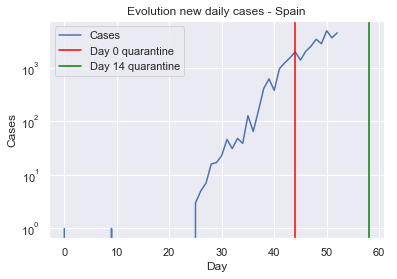

In [92]:
# Daily cases

sns.lineplot('Day', 'Cases', data = df , label = 'Cases')
plt.axvline(init_quarantine, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(init_quarantine + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases - Spain')
plt.legend()
plt.show()

# - logscale - 
sns.lineplot('Day', 'Cases', data = df , label = 'Cases')
plt.axvline(init_quarantine, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(init_quarantine + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases - Spain')
plt.yscale('log')
plt.legend()
plt.show()

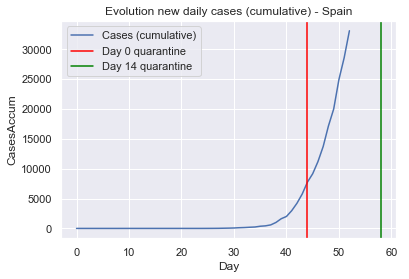

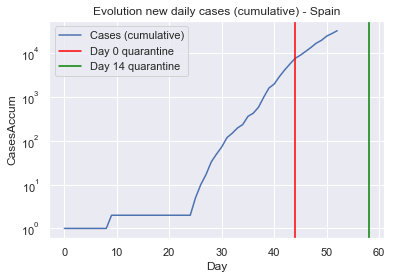

In [89]:
# Daily cases (cumulative)

sns.lineplot('Day', 'CasesAccum', data = df, label = 'Cases (cumulative)')
plt.axvline(init_quarantine, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(init_quarantine + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases (cumulative) - Spain')
plt.legend()
plt.show()


# - logscale - 
sns.lineplot('Day', 'CasesAccum', data = df, label = 'Cases (cumulative)')
plt.axvline(init_quarantine, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(init_quarantine + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases (cumulative) - Spain')
plt.yscale('log')
plt.legend()
plt.show()

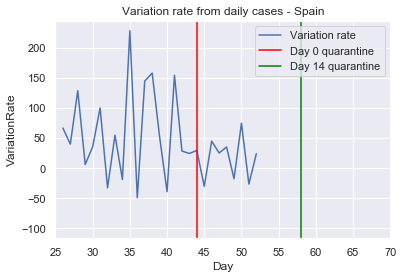

In [90]:
# Variation rate

sns.lineplot('Day', 'VariationRate', data = df, label = 'Variation rate')
plt.xlim(25,70)
plt.axvline(init_quarantine, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(init_quarantine + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Variation rate from daily cases - Spain')
plt.legend()
plt.show()

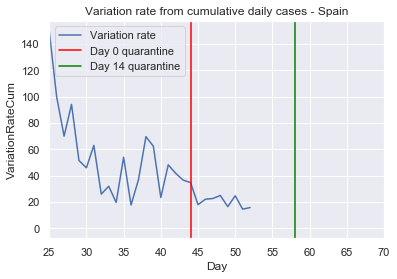

In [91]:
# Variation rate (cumulative)

sns.lineplot('Day', 'VariationRateCum', data = df, label = 'Variation rate')
plt.xlim(25,70)
plt.axvline(init_quarantine, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(init_quarantine + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Variation rate from cumulative daily cases - Spain')
plt.legend()
plt.show()